# 1 - Perkenalan

Nama : Husain Tsabit Abdur Rahim

Batch : Hacktiv - FTDS - Batch 016 - RMT

Dataset : Uber and Lyft Dataset Boston, MA

Objective :
- Mampu memahami konsep regression dengan Linear Regression.
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression.
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi.

# 2 - Import Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
import joblib
import json


# 3 - Data Loading

In [58]:
# Load dataset

df = pd.read_csv(r'/Users/husaintsabit/Downloads/rideshare_kaggle.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,...,693061,693062,693063,693064,693065,693066,693067,693068,693069,693070
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,462816a3-820d-408b-8549-0b39e82f65ac,474d6376-bc59-4ec9-bf57-4e6d6faeb165,4f9fee41-fde3-4767-bbf1-a00e108701fb,8612d909-98b8-4454-a093-30bd48de0cb3,...,54362c72-124b-47e8-8d07-62a07cfff624,64a50889-d05b-49de-b416-1802db5c27ac,6c1d9207-a9af-431e-a65f-3d9d205f28bf,25ed29df-4f9c-4aac-8218-681427f1d738,353e6566-b272-479e-a9c6-98bd6cb23f25,616d3611-1820-450a-9845-a9ff304a4842,633a3fc3-1f86-4b9e-9d48-2b7132112341,64d451d0-639f-47a4-9b7c-6fd92fbd264f,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223,1545071112.138,1543208580.2,1543780384.677,1543818482.645,1543315522.249,...,1543728484.0,1543728484.0,1543728484.0,1543728484.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0
hour,9,2,1,4,3,18,5,19,6,10,...,5,5,5,5,23,23,23,23,23,23
day,16,27,28,30,29,17,26,2,3,27,...,2,2,2,2,1,1,1,1,1,1
month,12,11,11,11,11,12,11,12,12,11,...,12,12,12,12,12,12,12,12,12,12
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20,2018-12-17 18:25:12,2018-11-26 05:03:00,2018-12-02 19:53:04,2018-12-03 06:28:02,2018-11-27 10:45:22,...,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,...,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Back Bay,Back Bay,Back Bay,Back Bay,...,Theatre District,Theatre District,Theatre District,West End,West End,West End,West End,West End,West End,West End
destination,North Station,North Station,North Station,North Station,North Station,North Station,Northeastern University,Northeastern University,Northeastern University,Northeastern University,...,Haymarket Square,Haymarket Square,Haymarket Square,North End,North End,North End,North End,North End,North End,North End
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,...,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber


In [59]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Statement : dari data diatas dapat dilihat bahwa dataset terisi dari 56 columns dan 693071 rows

In [60]:
#melihat deskripsi data
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


statement : dari pendeskripsian dataset dapat dilihat bahwa rata-rata tarif untuk sebuah trip yaitu USD 16.5 dengan tarif paling murah yaitu USD 2.5 dan tarif paling mahalnya yaitu USD 97.5, ketentuan harga yang diberikan bisa dipengaruhi oleh beberapa hal seperti pengaruh cuaca, jarak tempuh, waktu, dll. 

# 4 - Exploratory Data Analyst (EDA)

## Finding missing values

In [61]:
# melihat missing values 
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

statement : dapat di lihat bahwa pada dataset hanya terdapat missing value pada column 'price' dengan jumlah 55095

## Melihat persebaran data pada column price

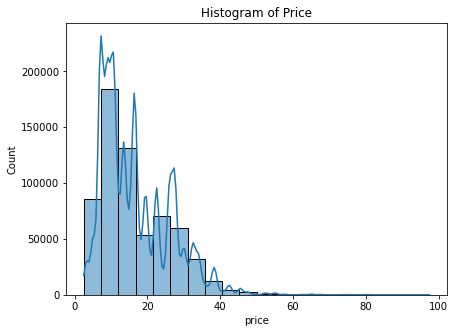

In [62]:
# melihat persebaran data pada column price
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Histogram of Price')

plt.show()

statement : dapat dilihat untuk persebaran data 'price' lebih condong ke kiri atau terdapat skewness

In [63]:
df_cab_type = df.groupby(['cab_type']).mean()['price'] #menghitung jumlah rata-rata tarif dari setiap cab_type 
df_cab_type = pd.DataFrame(df_cab_type.sort_values()) #menjadikannya dataframe dan mengurutkannya

print(df_cab_type)

              price
cab_type           
Uber      15.795343
Lyft      17.351396


statement : dapat di lihat bahwa rata-rata tarif Uber pada setiap perjalananya yaitu USD 15.7 dan Lyft yaitu USD 17.3

# 5 - Data Preprocessing

## Handle missing values

In [64]:
#drop missing values
df.dropna(axis=0, inplace=True)

In [65]:
#melihat data missing setelah di handling
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

statement : setelah menghapus data yang hilang, dataset yang kita miliki sudah tidak ada yang hilang

# Feature Selection

In [66]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,693059,693061,693062,693063,693064,693065,693066,693067,693069,693070
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,462816a3-820d-408b-8549-0b39e82f65ac,474d6376-bc59-4ec9-bf57-4e6d6faeb165,4f9fee41-fde3-4767-bbf1-a00e108701fb,8612d909-98b8-4454-a093-30bd48de0cb3,...,178bfa35-7df5-4ef8-a6eb-42a65f95bcce,54362c72-124b-47e8-8d07-62a07cfff624,64a50889-d05b-49de-b416-1802db5c27ac,6c1d9207-a9af-431e-a65f-3d9d205f28bf,25ed29df-4f9c-4aac-8218-681427f1d738,353e6566-b272-479e-a9c6-98bd6cb23f25,616d3611-1820-450a-9845-a9ff304a4842,633a3fc3-1f86-4b9e-9d48-2b7132112341,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223,1545071112.138,1543208580.2,1543780384.677,1543818482.645,1543315522.249,...,1543728484.0,1543728484.0,1543728484.0,1543728484.0,1543728484.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0,1543708386.0
hour,9,2,1,4,3,18,5,19,6,10,...,5,5,5,5,5,23,23,23,23,23
day,16,27,28,30,29,17,26,2,3,27,...,2,2,2,2,2,1,1,1,1,1
month,12,11,11,11,11,12,11,12,12,11,...,12,12,12,12,12,12,12,12,12,12
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20,2018-12-17 18:25:12,2018-11-26 05:03:00,2018-12-02 19:53:04,2018-12-03 06:28:02,2018-11-27 10:45:22,...,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-02 05:28:04,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05,2018-12-01 23:53:05
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,...,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Back Bay,Back Bay,Back Bay,Back Bay,...,Theatre District,Theatre District,Theatre District,Theatre District,West End,West End,West End,West End,West End,West End
destination,North Station,North Station,North Station,North Station,North Station,North Station,Northeastern University,Northeastern University,Northeastern University,Northeastern University,...,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,North End,North End,North End,North End,North End,North End
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,...,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber,Uber


In [67]:
# create new data frame with selecting column
df1 = df[['hour', 'cab_type', 'name', 'price', 'distance', 'apparentTemperature', 
        'apparentTemperatureMin', 'apparentTemperatureMax', 'short_summary', 'surge_multiplier', ]]

In [68]:
df1

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
0,9,Lyft,Shared,5.0,0.44,37.12,33.73,38.07,Mostly Cloudy,1.0
1,2,Lyft,Lux,11.0,0.44,37.35,36.20,43.92,Rain,1.0
2,1,Lyft,Lyft,7.0,0.44,32.93,31.04,44.12,Clear,1.0
3,4,Lyft,Lux Black XL,26.0,0.44,29.63,30.30,38.53,Clear,1.0
4,3,Lyft,Lyft XL,9.0,0.44,30.88,29.11,35.75,Partly Cloudy,1.0
...,...,...,...,...,...,...,...,...,...,...
693065,23,Uber,WAV,9.5,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693066,23,Uber,UberXL,13.0,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693067,23,Uber,UberX,9.5,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693069,23,Uber,Black SUV,27.0,1.00,37.05,27.77,44.09,Partly Cloudy,1.0


personal judgement : alasan saya memilih beberapa column tersebut karena saya ingin menjadikan column price sebagai target, dan juga saya rasa column lainnya sebagai pendukung dalam penentuan tarif. di dukung dari `ridester.com/surge-pricing/#:~:text=Uber%20surge%20pricing%20exists%20to,rides%20through%20the%20Uber%20app.` menjelaskan bahwa kelonjakan harga bisa terjadi karena beberapa faktor, diantaranya yaitu :
- Special events
- Rush hour
- Bad weather

## Get data for model inference

In [69]:
# get data for model inference

df_inf = df1.sample(10, random_state=11) 
#random_state digunakan supaya nilai random yang digunakan tidak berubah-ubah

df_inf

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
441022,19,Lyft,Lux,16.5,2.33,39.66,27.20,40.51,Overcast,1.0
133349,10,Uber,Black,20.5,2.66,26.66,26.41,40.53,Clear,1.0
97562,15,Uber,UberXL,15.0,1.36,37.49,26.35,40.61,Clear,1.0
422346,7,Lyft,Lyft,11.0,2.78,22.64,12.12,32.10,Overcast,1.0
439268,15,Uber,Black SUV,32.0,2.86,39.04,27.72,43.71,Clear,1.0
241445,12,Uber,WAV,9.5,2.79,29.04,28.43,36.11,Overcast,1.0
616361,5,Uber,Black,23.0,3.17,37.78,32.26,44.14,Rain,1.0
204174,20,Lyft,Lux Black,16.5,1.01,52.90,39.65,56.85,Mostly Cloudy,1.0
101404,12,Uber,Black,16.0,1.10,46.04,36.49,53.76,Overcast,1.0
327343,10,Uber,UberXL,11.5,1.35,20.38,13.79,32.85,Clear,1.0


In [70]:
# remove inference-set from dataset

df_train_test = df1.drop(df_inf.index)
df_train_test

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
0,9,Lyft,Shared,5.0,0.44,37.12,33.73,38.07,Mostly Cloudy,1.0
1,2,Lyft,Lux,11.0,0.44,37.35,36.20,43.92,Rain,1.0
2,1,Lyft,Lyft,7.0,0.44,32.93,31.04,44.12,Clear,1.0
3,4,Lyft,Lux Black XL,26.0,0.44,29.63,30.30,38.53,Clear,1.0
4,3,Lyft,Lyft XL,9.0,0.44,30.88,29.11,35.75,Partly Cloudy,1.0
...,...,...,...,...,...,...,...,...,...,...
693065,23,Uber,WAV,9.5,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693066,23,Uber,UberXL,13.0,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693067,23,Uber,UberX,9.5,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693069,23,Uber,Black SUV,27.0,1.00,37.05,27.77,44.09,Partly Cloudy,1.0


In [71]:
# reset index

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
0,19,Lyft,Lux,16.5,2.33,39.66,27.20,40.51,Overcast,1.0
1,10,Uber,Black,20.5,2.66,26.66,26.41,40.53,Clear,1.0
2,15,Uber,UberXL,15.0,1.36,37.49,26.35,40.61,Clear,1.0
3,7,Lyft,Lyft,11.0,2.78,22.64,12.12,32.10,Overcast,1.0
4,15,Uber,Black SUV,32.0,2.86,39.04,27.72,43.71,Clear,1.0
5,12,Uber,WAV,9.5,2.79,29.04,28.43,36.11,Overcast,1.0
6,5,Uber,Black,23.0,3.17,37.78,32.26,44.14,Rain,1.0
7,20,Lyft,Lux Black,16.5,1.01,52.90,39.65,56.85,Mostly Cloudy,1.0
8,12,Uber,Black,16.0,1.10,46.04,36.49,53.76,Overcast,1.0
9,10,Uber,UberXL,11.5,1.35,20.38,13.79,32.85,Clear,1.0


## Splitting between 'X' (features) and 'y' (target)

In [72]:
# splitting between X and y

X = df1.drop(['price'], axis=1)
y = df1['price']
X

,hour,cab_type,name,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
0,9,Lyft,Shared,0.44,37.12,33.73,38.07,Mostly Cloudy,1.0
1,2,Lyft,Lux,0.44,37.35,36.20,43.92,Rain,1.0
2,1,Lyft,Lyft,0.44,32.93,31.04,44.12,Clear,1.0
3,4,Lyft,Lux Black XL,0.44,29.63,30.30,38.53,Clear,1.0
4,3,Lyft,Lyft XL,0.44,30.88,29.11,35.75,Partly Cloudy,1.0
...,...,...,...,...,...,...,...,...,...
693065,23,Uber,WAV,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693066,23,Uber,UberXL,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693067,23,Uber,UberX,1.00,37.05,27.77,44.09,Partly Cloudy,1.0
693069,23,Uber,Black SUV,1.00,37.05,27.77,44.09,Partly Cloudy,1.0


In [73]:
# splitting between train-set and test-set

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=11)
# mendefinisikan train test, angka 0.2 mendefinisikan data test menggunakan 20% dari keseluruhan data

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (510380, 9)
Test Size :  (127596, 9)


## Handling outlier

### checking the distribution

In [74]:
# function to create histogram and boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

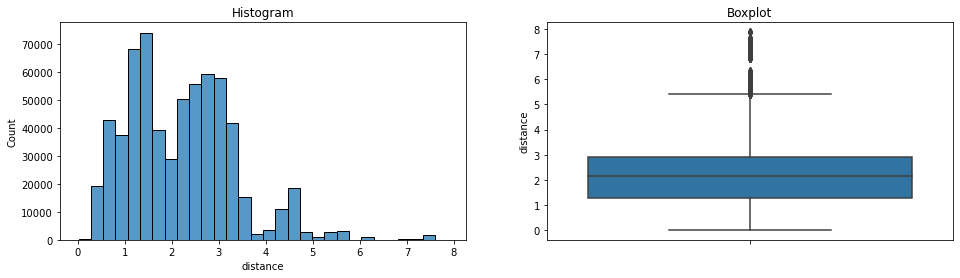


Skewness Value :  0.8168484903389348


In [75]:
diagnostic_plots(df1, 'distance')
print('\nSkewness Value : ', df1['distance'].skew())

distance is not normally distributed, it is skewed with tail to the right. According to the boxplot, there are some outliers at the right end of the distribution of the variable.

### Outlier detection 

In [76]:
# create function to find upper and lower boundaries for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [77]:
# looking for outliers

upper_boundary, lower_boundary = find_skewed_boundaries(df1, 'distance', 1.5)
upper_boundary, lower_boundary

print('Distance_upper_limit : ', upper_boundary)
print('Distance_upper_limit : ', lower_boundary)

Distance_upper_limit :  5.42
Distance_upper_limit :  -1.2200000000000002


statement : The upper boundary shows a value of ~6. The lower boundary is negative, however the variable 'Distance' does not take negative values. So to calculate the outliers for distance we only use the upper boundary. We observe 6672 total distance, 1.04 % of the dataset, with extermely high values for 'Distance'.

### Handling Outlier

In [78]:
# flag the outliers in category `Distance`
outliers_distance = np.where(df1['distance'] > upper_boundary, True,
np.where(df1['distance'] < lower_boundary, True, False))

print(outliers_distance[:10])

[False False False False False False False False False False]


In [79]:
# Trim the dataset
df_trimmed = df1.loc[~(outliers_distance)]
print('Size dataset - Before trimming : ', df1.shape)
print('Size dataset - After trimming : ', df_trimmed.shape)

Size dataset - Before trimming :  (637976, 10)
Size dataset - After trimming :  (631304, 10)


statement : according to the data above, we can see that using trimming, we removed 6672 rows, this is about ~1% of the data was removed.

## Split between numerical column and categorical column

In [80]:
# get numerical columns and categorical columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_columns)
print('Categorical Columns  : ', cat_columns)

Numerical Columns    :  ['hour', 'distance', 'apparentTemperature', 'apparentTemperatureMin', 'apparentTemperatureMax', 'surge_multiplier']
Categorical Columns  :  ['cab_type', 'name', 'short_summary']


In [81]:
# split train-set and test-set based on column types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,hour,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,surge_multiplier
537027,6,2.33,13.96,13.60,32.95,1.0
194463,2,3.05,46.78,35.71,50.45,1.0
252502,12,3.22,29.04,28.43,36.11,1.0
93825,16,1.08,43.15,35.33,52.19,1.0
241118,18,1.01,43.64,28.06,43.99,1.0
...,...,...,...,...,...,...
62569,22,0.93,49.50,35.73,50.11,1.0
375070,12,2.14,44.19,31.86,43.85,1.0
111123,18,2.34,46.21,35.78,50.27,1.0
390660,7,1.46,38.41,35.71,50.45,1.0


## Feature Scaling

In [82]:
#showing the X_train_num dataframe
X_train_num

,hour,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,surge_multiplier
537027,6,2.33,13.96,13.60,32.95,1.0
194463,2,3.05,46.78,35.71,50.45,1.0
252502,12,3.22,29.04,28.43,36.11,1.0
93825,16,1.08,43.15,35.33,52.19,1.0
241118,18,1.01,43.64,28.06,43.99,1.0
...,...,...,...,...,...,...
62569,22,0.93,49.50,35.73,50.11,1.0
375070,12,2.14,44.19,31.86,43.85,1.0
111123,18,2.34,46.21,35.78,50.27,1.0
390660,7,1.46,38.41,35.71,50.45,1.0


In [83]:
X_train_num.describe()

,hour,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,surge_multiplier
count,510380.000000,510380.000000,510380.000000,510380.000000,510380.000000,510380.000000
mean,11.615579,2.188411,35.875574,29.728141,41.992360,1.015059
std,6.952887,1.135264,7.914819,7.109802,6.932234,0.095364
min,0.000000,0.020000,12.130000,11.810000,28.950000,1.000000
25%,6.000000,1.270000,31.910000,27.760000,36.570000,1.000000
50%,12.000000,2.150000,35.900000,30.130000,40.950000,1.000000
75%,18.000000,2.930000,40.010000,35.710000,44.090000,1.000000
max,23.000000,7.860000,57.220000,40.050000,57.200000,3.000000


In [84]:
scaler = MinMaxScaler() #memanggil MinMaxScaler
scaler.fit(X_train_num) #menyuruh ML untuk mempelajari dan .fit hanya untuk train

X_train_num_scaled = scaler.transform(X_train_num) #transform bisa kemanasaja
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.26086957, 0.29464286, 0.0405855 , 0.06338527, 0.14159292,
        0.        ],
       [0.08695652, 0.38647959, 0.76846307, 0.84631728, 0.76106195,
        0.        ],
       [0.52173913, 0.40816327, 0.37502772, 0.58852691, 0.25345133,
        0.        ],
       ...,
       [0.7826087 , 0.29591837, 0.75582169, 0.84879603, 0.75469027,
        0.        ],
       [0.30434783, 0.18367347, 0.58283433, 0.84631728, 0.76106195,
        0.        ],
       [0.39130435, 0.12372449, 0.41006875, 0.65474504, 0.33911504,
        0.        ]])

## Feature Encoding

In [85]:
# melihat jumlah unique categori di setiap column

print('Jumlah categori pada column cab_tyoe        : {}'.format(len(df1.cab_type.unique())))
print('Jumlah categori pada column name            : {}'.format(len(df1.name.unique())))
print('Jumlah categori pada column short_summary   : {}'.format(len(df1.short_summary.unique())))

Jumlah categori pada column cab_tyoe        : 2
Jumlah categori pada column name            : 12
Jumlah categori pada column short_summary   : 9


In [86]:
# Display X_train_cat

X_train_cat

,cab_type,name,short_summary
537027,Uber,WAV,Clear
194463,Uber,Black SUV,Overcast
252502,Lyft,Lux Black XL,Overcast
93825,Lyft,Shared,Light Rain
241118,Lyft,Lux Black,Partly Cloudy
...,...,...,...
62569,Lyft,Lyft XL,Overcast
375070,Uber,UberXL,Light Rain
111123,Lyft,Lux,Light Rain
390660,Uber,UberX,Overcast


In [87]:
# Feature Encoding using OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Lyft', 'Uber'],
                                    ['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft',
                                    'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV'],
                                    [' Clear ', ' Drizzle ', ' Foggy ', ' Light Rain ',
                                    ' Mostly Cloudy ', ' Overcast ', ' Partly Cloudy ',
                                    ' Possible Drizzle ', ' Rain ']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[ 1., 11.,  0.],
       [ 1.,  1.,  5.],
       [ 0.,  4.,  5.],
       ...,
       [ 0.,  2.,  3.],
       [ 1.,  9.,  5.],
       [ 0.,  2.,  4.]])

## concate between numerical columns and categorical columns

In [88]:
#concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1) #concatenate data train
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1) #concatenate data test
X_train_final

array([[ 0.26086957,  0.29464286,  0.0405855 , ...,  1.        ,
        11.        ,  0.        ],
       [ 0.08695652,  0.38647959,  0.76846307, ...,  1.        ,
         1.        ,  5.        ],
       [ 0.52173913,  0.40816327,  0.37502772, ...,  0.        ,
         4.        ,  5.        ],
       ...,
       [ 0.7826087 ,  0.29591837,  0.75582169, ...,  0.        ,
         2.        ,  3.        ],
       [ 0.30434783,  0.18367347,  0.58283433, ...,  1.        ,
         9.        ,  5.        ],
       [ 0.39130435,  0.12372449,  0.41006875, ...,  0.        ,
         2.        ,  4.        ]])

In [89]:
# transform 'X_train_final' into dataframe

X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,hour,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,surge_multiplier,cab_type,name,short_summary
0,0.260870,0.294643,0.040585,0.063385,0.141593,0.0,1.0,11.0,0.0
1,0.086957,0.386480,0.768463,0.846317,0.761062,0.0,1.0,1.0,5.0
2,0.521739,0.408163,0.375028,0.588527,0.253451,0.0,0.0,4.0,5.0
3,0.695652,0.135204,0.687957,0.832861,0.822655,0.0,0.0,7.0,3.0
4,0.782609,0.126276,0.698825,0.575425,0.532389,0.0,0.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
510375,0.956522,0.116071,0.828787,0.847025,0.749027,0.0,0.0,6.0,5.0
510376,0.521739,0.270408,0.711022,0.709986,0.527434,0.0,1.0,10.0,3.0
510377,0.782609,0.295918,0.755822,0.848796,0.754690,0.0,0.0,2.0,3.0
510378,0.304348,0.183673,0.582834,0.846317,0.761062,0.0,1.0,9.0,5.0


# 6 - Model Definition

- Pada model definition ini Algoritma yang akan dipakai adalah `Linear Regression`. Alasan penggunaan jenis algoritma regresi linier adalah Pada dataset ini variabel bersifat kontinu dan hubungan antara variabel dependen dengan variabel independen diasumsikan bersifat linier. 

- Sedangkan untuk Metrics yang anak dipakai adalah `Mean Absolute Error (MAE)`. Alasan penggunaan MAE yaitu untuk mengukur keakuratan suatu model statistik dalam melakukan prediksi peramalan.

## Linear Regression

In [90]:
model_lin_reg = LinearRegression() # mendefinisikan model

# 7 - Model Training

## Linear Regression

In [91]:
# train the model
model_lin_reg.fit(X_train_final, y_train) #.fit hanya untuk train

LinearRegression()

# 8 - Model Evaluation

## Linear Regression

In [92]:
# melakukan predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

y_pred_train

array([ 8.86944324, 27.10975502, 20.40129906, ..., 21.18778731,
        9.70830352, 17.42797164])

In [93]:
# display `y_train`
y_train

537027    10.5
194463    30.5
252502    38.5
93825      5.0
241118    16.5
          ... 
62569     10.5
375070    15.0
111123    16.5
390660     8.0
438058    13.5
Name: price, Length: 510380, dtype: float64

In [94]:
# model evaluation using MAE

print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  5.1649034496433535
MAE test =  5.172626017946176
r2score train =  0.5137947714105378
r2score test =  0.5149187201361676


statement : berdasarkan hasil dari perhitungan Mean Absolute Error (MAE) di atas, dapat dilihat bahwa model tergolong underfit, karena nilai MAE test > dari nilai MAE train.

# 9 - Model Saving

In [95]:
# saving model linear regression into local
with open ('model_lin_reg.pkl', 'wb') as file_1:
    joblib.dump(model_lin_reg, file_1)

# saving scalar
with open('model_scaler.pkl', 'wb') as file_2:
    joblib.dump(scaler, file_2)

# saving encoder
with open('model_encoder.pkl', 'wb') as file_3:
    joblib.dump(encoder, file_3)

# saving numeric columns
with open('list_num_cols.txt', 'w') as file_4:
    json.dump(num_columns, file_4)

# saving categorical column
with open('list_cat_cols.txt', 'w') as file_5:
    json.dump(cat_columns, file_5)

# 10 - Model Inference

## Load Model

In [96]:
# Load all files

with open ('model_lin_reg.pkl', 'rb') as file_1:
    model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
    model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
    list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
    list_cat_cols = json.load(file_5)

## Inferencing

In [97]:
# Display the Inference set

df_inf

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier
0,19,Lyft,Lux,16.5,2.33,39.66,27.20,40.51,Overcast,1.0
1,10,Uber,Black,20.5,2.66,26.66,26.41,40.53,Clear,1.0
2,15,Uber,UberXL,15.0,1.36,37.49,26.35,40.61,Clear,1.0
3,7,Lyft,Lyft,11.0,2.78,22.64,12.12,32.10,Overcast,1.0
4,15,Uber,Black SUV,32.0,2.86,39.04,27.72,43.71,Clear,1.0
5,12,Uber,WAV,9.5,2.79,29.04,28.43,36.11,Overcast,1.0
6,5,Uber,Black,23.0,3.17,37.78,32.26,44.14,Rain,1.0
7,20,Lyft,Lux Black,16.5,1.01,52.90,39.65,56.85,Mostly Cloudy,1.0
8,12,Uber,Black,16.0,1.10,46.04,36.49,53.76,Overcast,1.0
9,10,Uber,UberXL,11.5,1.35,20.38,13.79,32.85,Clear,1.0


In [98]:
# Split between Numerical Columns and Categorical Columns

df_inf_num = df_inf[list_num_cols]
df_inf_cat = df_inf[list_cat_cols]

df_inf_num

,hour,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,surge_multiplier
0,19,2.33,39.66,27.20,40.51,1.0
1,10,2.66,26.66,26.41,40.53,1.0
2,15,1.36,37.49,26.35,40.61,1.0
3,7,2.78,22.64,12.12,32.10,1.0
4,15,2.86,39.04,27.72,43.71,1.0
5,12,2.79,29.04,28.43,36.11,1.0
6,5,3.17,37.78,32.26,44.14,1.0
7,20,1.01,52.90,39.65,56.85,1.0
8,12,1.10,46.04,36.49,53.76,1.0
9,10,1.35,20.38,13.79,32.85,1.0


In [99]:
# Feature Scaling and Feature Encoding

df_inf_num_scaled = model_scaler.transform(df_inf_num)
df_inf_cat_encoded = model_encoder.transform(df_inf_cat)

df_inf_num_scaled

array([[0.82608696, 0.29464286, 0.61055666, 0.54497167, 0.40920354,
        0.        ],
       [0.43478261, 0.33673469, 0.3222444 , 0.51699717, 0.4099115 ,
        0.        ],
       [0.65217391, 0.17091837, 0.56243069, 0.51487252, 0.41274336,
        0.        ],
       [0.30434783, 0.35204082, 0.23308938, 0.01097734, 0.11150442,
        0.        ],
       [0.65217391, 0.3622449 , 0.59680639, 0.56338527, 0.52247788,
        0.        ],
       [0.52173913, 0.35331633, 0.37502772, 0.58852691, 0.25345133,
        0.        ],
       [0.2173913 , 0.40178571, 0.56886228, 0.72415014, 0.53769912,
        0.        ],
       [0.86956522, 0.12627551, 0.90419162, 0.98583569, 0.98761062,
        0.        ],
       [0.52173913, 0.1377551 , 0.75205145, 0.87393768, 0.87823009,
        0.        ],
       [0.43478261, 0.16964286, 0.1829674 , 0.07011331, 0.1380531 ,
        0.        ]])

In [100]:
# Concate Numerical Columns and Categorical Columns

df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)
df_inf_final

array([[8.26086957e-01, 2.94642857e-01, 6.10556664e-01, 5.44971671e-01,
        4.09203540e-01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        5.00000000e+00],
       [4.34782609e-01, 3.36734694e-01, 3.22244400e-01, 5.16997167e-01,
        4.09911504e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.52173913e-01, 1.70918367e-01, 5.62430694e-01, 5.14872521e-01,
        4.12743363e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+01,
        0.00000000e+00],
       [3.04347826e-01, 3.52040816e-01, 2.33089377e-01, 1.09773371e-02,
        1.11504425e-01, 0.00000000e+00, 0.00000000e+00, 5.00000000e+00,
        5.00000000e+00],
       [6.52173913e-01, 3.62244898e-01, 5.96806387e-01, 5.63385269e-01,
        5.22477876e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [5.21739130e-01, 3.53316327e-01, 3.75027722e-01, 5.88526912e-01,
        2.53451327e-01, 0.00000000e+00, 1.00000000e+00, 1.10000000e+01,
        5.0

In [101]:
# Predict using polynomial regression

y_pred_inf = model_lin_reg.predict(df_inf_final)
y_pred_inf

array([21.16056232, 27.63261392,  7.7822621 , 17.54843844, 26.56258583,
       10.16477567, 29.07615088, 15.86376508, 23.300528  ,  7.75578565])

In [102]:
# Create DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,21.160562
1,27.632614
2,7.782262
3,17.548438
4,26.562586
5,10.164776
6,29.076151
7,15.863765
8,23.300528
9,7.755786


In [103]:
# Concate between Inference-Set and Rating's Prediction

pd.concat([df_inf, y_pred_inf_df], axis=1)

,hour,cab_type,name,price,distance,apparentTemperature,apparentTemperatureMin,apparentTemperatureMax,short_summary,surge_multiplier,Price - Prediction
0,19,Lyft,Lux,16.5,2.33,39.66,27.20,40.51,Overcast,1.0,21.160562
1,10,Uber,Black,20.5,2.66,26.66,26.41,40.53,Clear,1.0,27.632614
2,15,Uber,UberXL,15.0,1.36,37.49,26.35,40.61,Clear,1.0,7.782262
3,7,Lyft,Lyft,11.0,2.78,22.64,12.12,32.10,Overcast,1.0,17.548438
4,15,Uber,Black SUV,32.0,2.86,39.04,27.72,43.71,Clear,1.0,26.562586
5,12,Uber,WAV,9.5,2.79,29.04,28.43,36.11,Overcast,1.0,10.164776
6,5,Uber,Black,23.0,3.17,37.78,32.26,44.14,Rain,1.0,29.076151
7,20,Lyft,Lux Black,16.5,1.01,52.90,39.65,56.85,Mostly Cloudy,1.0,15.863765
8,12,Uber,Black,16.0,1.10,46.04,36.49,53.76,Overcast,1.0,23.300528
9,10,Uber,UberXL,11.5,1.35,20.38,13.79,32.85,Clear,1.0,7.755786


# 11-Overall Analysis

Kesimpulan :

kesimpulan yang dapat diambil dari penggunaan Linear Regression di atas dengan menerapkan beberapa feature mendapatkan hasil Mean Absolute Error (MAE) di angka 5.164, hal ini menunjukkan hasil prediksi harga dari data yang sudah di olah meleset sekitar 5 USD, menurut saya hasil ini masih miss jauh dari harapan, oleh karena itu saya rasa untuk meningkatkan hasil prediksi yang diinginkan saya harap kedepannya bisa menambahkan beberapa feature yang dibutuhkan seperti Polynomial Regression, dll.

# Conceptual Problems

## 1 - Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Asumsi - asumsi yang harus dipenuhi dalam analisis regresi antara lain, yaitu : Normalitas, homoskedastisitas, non autokorelasi, non multikolinieritas, dan linearitas.

1. Asumsi Normalitas

uji normalitas merupakan uji yang dilakukan untuk menilai sebaran data pada sebuah kelompok data atau variabel. Dari uji normalitas ini nantinya akan diknelai sebaran data yang dihasilkan apakah data yang kita ujikan itu berdistribusi normal atau tidak.

Source : `https://www.dqlab.id/kenali-uji-asumsi-klasik-pada-metode-statistik-regresi`

2. Asumsi homoskedastisitas 

homoskedastisitas adalah kondisi ketika nilai residu pada tiap nilai prediksi bervariasi dan variasinya cenderung konstan.

source : `http://widhiarso.staff.ugm.ac.id/files/Wahyu%20-%20Berkenalan%20dengan%20Heterokedastisitas.pdf`

3. Non autokorelasi

auto korelasi merupakan hubungan residual satu observasi dengan residual observasi yang lain. Autokorelasi adalah korelasi dari Time Series dengan kelambatannya sendiri. Ketika residu mengalami autokorelasi, itu berarti bahwa nilai saat ini tergantung dari nilai-nilai (historis) sebelumnya dan bahwa ada pola pasti yang tidak dapat dijelaskan dalam variabel Y yang muncul dalam gangguan.

Auto korelasi ini berlaku terutama untuk data deret waktu (time series), walaupun demikian bukan berarti pada data cross section autokorelasi tidak penting.

source :`https://maglearning.id/2019/05/26 asumsi-asumsi-model-persamaan-regresi-linier/`

4. Asumsi non-multikolinearitas 

Asumsi non-multikolinearitas adalah tidak terjadinya hubungan yang tinggi antar variabel bebas. Jika asumsu non-multikolinearitas ini tidak terpenuhi, maka dapat ditangani menggunakan regresi Ridge, LASSO, PLS, PCR, dan Akar Laten.

source : `http://repository.ub.ac.id/id/eprint/184102/#:~:text=Asumsi%20non%2Dmultikolinearitas%20adalah%20tidak,%2C%20PCR%2C%20dan%20Akar%20Laten.`

5. Asumsi Linearitas

Uji linearitas merupakan salah satu syarat yang dilakukan dalam analisis korelasi atau regresi linear. Pengujian ini bertujuan untuk mengetahui apakah dalam variabel independen dan variabel dependen memiliki hubungan yang linear atau tidak secara signifikan.

source : `http://repository.unika.ac.id/17672/6/15.E2.0002%20ALDILA%20DYAS%20NURFITRI%2C%20S.PSI%20%289.34%29..BAB%20V.pdf`

## 2 - Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

In [104]:
# Get Intercept and slope

print('Intercept    : ', model_lin_reg.intercept_)
print('Slope        : ', model_lin_reg.coef_)

Intercept    :  17.954487428104738
Slope        :  [ 1.14638363e-03  2.18512813e+01 -3.10896586e-02  9.90136497e-03
  2.09303559e-02  4.08585239e+01  2.31586343e+00 -1.62198728e+00
  3.15994411e-03]


Slope : merupakan ukuran kemiringan dari suatu garis, slope bisa dibilang sebagai koefisien regresi untuk variabel X (variabel bebas). Slope juga merupakan suatu nilai yang menunjukkan seberapa besar kontribusi (sumbangan) yang diberikan suatu variabel X terhadap variabel Y.

Intercept : sedangkan intercept merupakan nilai rata-rata pada variabel Y apabila nilai pada variabel X bernilai 0. Dengan kata lain, apabila X tidak memberikan kontribusi, maka secara rata-rata, variabel Y akan bernilai sebesar intercept itu sendiri. Dalam hal ini Intercept bernilai 17.954

In [106]:
# List all columns

X_train_final_df.columns

MultiIndex([(                  'hour',),
            (              'distance',),
            (   'apparentTemperature',),
            ('apparentTemperatureMin',),
            ('apparentTemperatureMax',),
            (      'surge_multiplier',),
            (              'cab_type',),
            (                  'name',),
            (         'short_summary',)],
           )